# Part = 1

In [1]:
# Numerical libraries
import numpy as np   
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    
#importing seaborn for statistical plots
import seaborn as sns
from sklearn import metrics
import json   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.decomposition import PCA

In [2]:
df1=pd.read_csv("Part1 - Car name.csv")
df1

car_name
0    chevrolet chevelle malibu
1            buick skylark 320
2           plymouth satellite
3                amc rebel sst
4                  ford torino
..                         ...
393            ford mustang gl
394                  vw pickup
395              dodge rampage
396                ford ranger
397                 chevy s-10

[398 rows x 1 columns]

In [3]:
df1.shape

(398, 1)

In [4]:
df1.size

398

In [5]:
df2=pd.read_json('Part1 - Car-Attributes.json')
df2

mpg  cyl   disp   hp    wt   acc  yr  origin
0    18.0    8  307.0  130  3504  12.0  70       1
1    15.0    8  350.0  165  3693  11.5  70       1
2    18.0    8  318.0  150  3436  11.0  70       1
3    16.0    8  304.0  150  3433  12.0  70       1
4    17.0    8  302.0  140  3449  10.5  70       1
..    ...  ...    ...  ...   ...   ...  ..     ...
393  27.0    4  140.0   86  2790  15.6  82       1
394  44.0    4   97.0   52  2130  24.6  82       2
395  32.0    4  135.0   84  2295  11.6  82       1
396  28.0    4  120.0   79  2625  18.6  82       1
397  31.0    4  119.0   82  2720  19.4  82       1

[398 rows x 8 columns]

In [6]:
df2.shape

(398, 8)

In [7]:
df2.size

3184

In [8]:
df3=pd.concat([df1,df2],axis=1)
df3

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0    chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1            buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2           plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3                amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                  ford torino  17.0    8  302.0  140  3449  10.5  70       1
..                         ...   ...  ...    ...  ...   ...   ...  ..     ...
393            ford mustang gl  27.0    4  140.0   86  2790  15.6  82       1
394                  vw pickup  44.0    4   97.0   52  2130  24.6  82       2
395              dodge rampage  32.0    4  135.0   84  2295  11.6  82       1
396                ford ranger  28.0    4  120.0   79  2625  18.6  82       1
397                 chevy s-10  31.0    4  119.0   82  2720  19.4  82       1

[398 rows x 9 columns]

In [9]:
df3.shape

(398, 9)

In [10]:
df3.size

3582

In [11]:
df3.to_csv("data.csv")

In [12]:
df=pd.read_csv('data.csv')
df

Unnamed: 0                   car_name   mpg  cyl   disp   hp    wt   acc  \
0             0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0   
1             1          buick skylark 320  15.0    8  350.0  165  3693  11.5   
2             2         plymouth satellite  18.0    8  318.0  150  3436  11.0   
3             3              amc rebel sst  16.0    8  304.0  150  3433  12.0   
4             4                ford torino  17.0    8  302.0  140  3449  10.5   
..          ...                        ...   ...  ...    ...  ...   ...   ...   
393         393            ford mustang gl  27.0    4  140.0   86  2790  15.6   
394         394                  vw pickup  44.0    4   97.0   52  2130  24.6   
395         395              dodge rampage  32.0    4  135.0   84  2295  11.6   
396         396                ford ranger  28.0    4  120.0   79  2625  18.6   
397         397                 chevy s-10  31.0    4  119.0   82  2720  19.4   

     yr  origin  
0    70       1  
1    70       1  
2    70       1  
3    70       1  
4    70       1  
..   ..     ...  
393  82       1  
394  82       2  
395  82       1  
396  82       1  
397  82       1  

[398 rows x 10 columns]

In [13]:
df=df.drop(['Unnamed: 0'],axis=1)

In [14]:
df

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0    chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1            buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2           plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3                amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                  ford torino  17.0    8  302.0  140  3449  10.5  70       1
..                         ...   ...  ...    ...  ...   ...   ...  ..     ...
393            ford mustang gl  27.0    4  140.0   86  2790  15.6  82       1
394                  vw pickup  44.0    4   97.0   52  2130  24.6  82       2
395              dodge rampage  32.0    4  135.0   84  2295  11.6  82       1
396                ford ranger  28.0    4  120.0   79  2625  18.6  82       1
397                 chevy s-10  31.0    4  119.0   82  2720  19.4  82       1

[398 rows x 9 columns]

In [15]:
df.shape

(398, 9)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [17]:
df.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [18]:
#dropping/ignoring car_name  and origin
df = df.drop(['car_name','origin'], axis=1)
df.head()

mpg  cyl   disp   hp    wt   acc  yr
0  18.0    8  307.0  130  3504  12.0  70
1  15.0    8  350.0  165  3693  11.5  70
2  18.0    8  318.0  150  3436  11.0  70
3  16.0    8  304.0  150  3433  12.0  70
4  17.0    8  302.0  140  3449  10.5  70

In [19]:
df.isna().sum()

mpg     0
cyl     0
disp    0
hp      0
wt      0
acc     0
yr      0
dtype: int64

In [20]:
df.duplicated().sum()

0

In [21]:
df.describe()

mpg         cyl        disp           wt         acc          yr
count  398.000000  398.000000  398.000000   398.000000  398.000000  398.000000
mean    23.514573    5.454774  193.425879  2970.424623   15.568090   76.010050
std      7.815984    1.701004  104.269838   846.841774    2.757689    3.697627
min      9.000000    3.000000   68.000000  1613.000000    8.000000   70.000000
25%     17.500000    4.000000  104.250000  2223.750000   13.825000   73.000000
50%     23.000000    4.000000  148.500000  2803.500000   15.500000   76.000000
75%     29.000000    8.000000  262.000000  3608.000000   17.175000   79.000000
max     46.600000    8.000000  455.000000  5140.000000   24.800000   82.000000

In [22]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(df.hp.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
df[hpIsDigit.hp == False] 

mpg  cyl   disp hp    wt   acc  yr
32   25.0    4   98.0  ?  2046  19.0  71
126  21.0    6  200.0  ?  2875  17.0  74
330  40.9    4   85.0  ?  1835  17.3  80
336  23.6    4  140.0  ?  2905  14.3  80
354  34.5    4  100.0  ?  2320  15.8  81
374  23.0    4  151.0  ?  3035  20.5  82

In [23]:
df = df.replace('?', np.nan)
df[hpIsDigit['hp'] == False] 

mpg  cyl   disp   hp    wt   acc  yr
32   25.0    4   98.0  NaN  2046  19.0  71
126  21.0    6  200.0  NaN  2875  17.0  74
330  40.9    4   85.0  NaN  1835  17.3  80
336  23.6    4  140.0  NaN  2905  14.3  80
354  34.5    4  100.0  NaN  2320  15.8  81
374  23.0    4  151.0  NaN  3035  20.5  82

In [24]:
#instead of dropping the rows, lets replace the missing values with median value. 
df.median()

mpg       23.0
cyl        4.0
disp     148.5
hp        93.5
wt      2803.5
acc       15.5
yr        76.0
dtype: float64

In [25]:
df.describe()

mpg         cyl        disp           wt         acc          yr
count  398.000000  398.000000  398.000000   398.000000  398.000000  398.000000
mean    23.514573    5.454774  193.425879  2970.424623   15.568090   76.010050
std      7.815984    1.701004  104.269838   846.841774    2.757689    3.697627
min      9.000000    3.000000   68.000000  1613.000000    8.000000   70.000000
25%     17.500000    4.000000  104.250000  2223.750000   13.825000   73.000000
50%     23.000000    4.000000  148.500000  2803.500000   15.500000   76.000000
75%     29.000000    8.000000  262.000000  3608.000000   17.175000   79.000000
max     46.600000    8.000000  455.000000  5140.000000   24.800000   82.000000

In [26]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#cData = cData.fillna(cData.median())

medianFiller = lambda x: x.fillna(x.median())
df = df.apply(medianFiller,axis=0)

df['hp'] = df['hp'].astype('float64')  # converting the hp column from object / string type to float

<AxesSubplot:xlabel='mpg', ylabel='Count'>

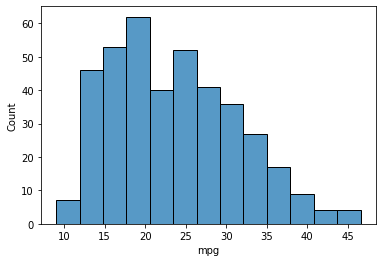

In [27]:
sns.histplot(df.mpg)

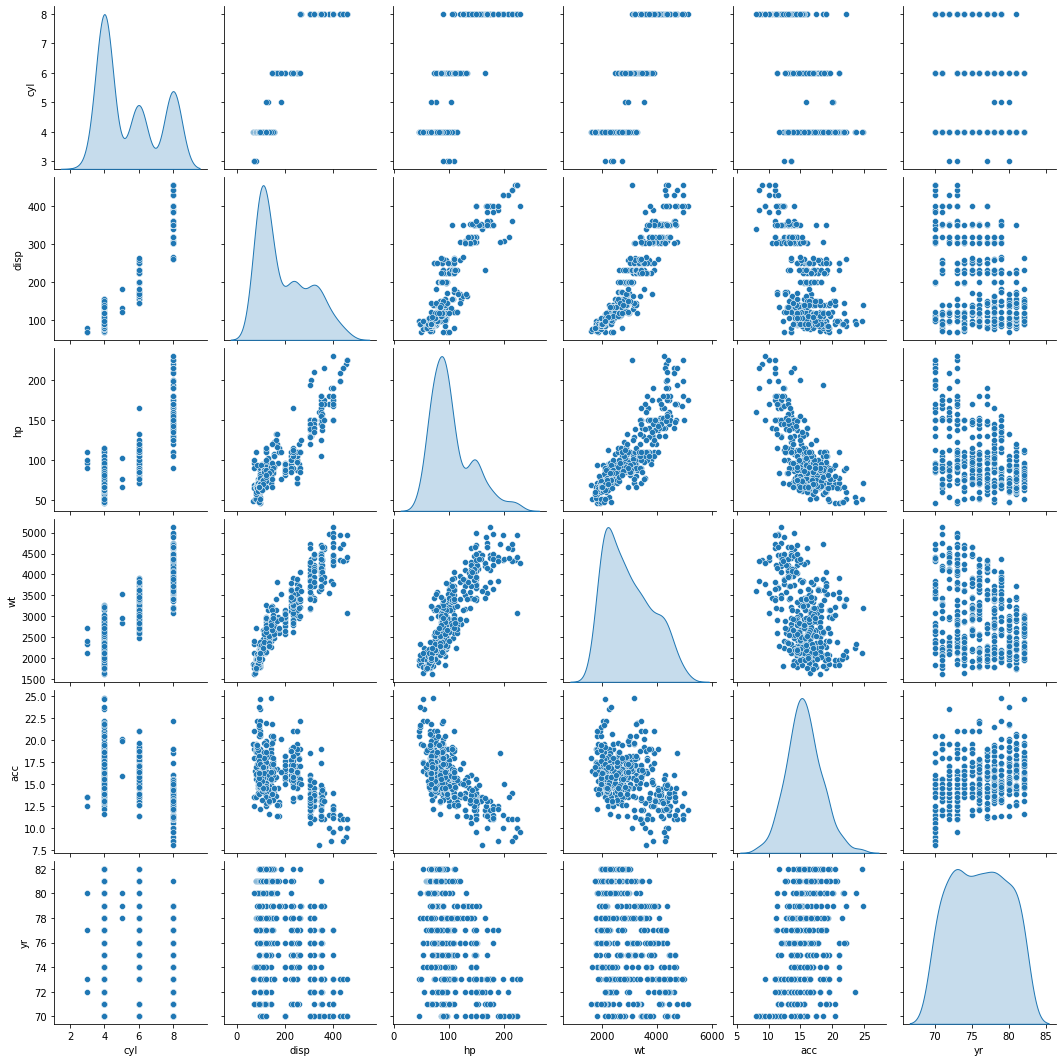

In [28]:
# independant variables
X = df.drop(['mpg'], axis=1)
# the dependent variable
y = df[['mpg']]

sns.pairplot(X, diag_kind='kde')   # to plot density curve instead of histogram on the diag

In [29]:
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

cyl      disp        hp        wt       acc        yr
0  1.498191  1.090604  0.673118  0.630870 -1.295498 -1.627426
1  1.498191  1.503514  1.589958  0.854333 -1.477038 -1.627426
2  1.498191  1.196232  1.197027  0.550470 -1.658577 -1.627426
3  1.498191  1.061796  1.197027  0.546923 -1.295498 -1.627426
4  1.498191  1.042591  0.935072  0.565841 -1.840117 -1.627426

# Group Data into similar clusters 

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

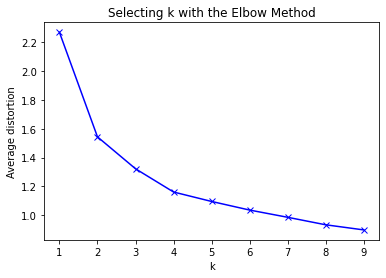

In [30]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(XScaled)
    prediction=model.predict(XScaled)
    meanDistortions.append(sum(np.min(cdist(XScaled, model.cluster_centers_, 'euclidean'), axis=1)) / XScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Though the bend is not coming out clearly as there are many bends, let us look at 2,3 and 4clusters

In [31]:
k_means = KMeans(n_clusters = 3)
k_means.fit(XScaled)
k_means.inertia_

807.4006449831976

In [32]:
k_means = KMeans(n_clusters = 4)
k_means.fit(XScaled)
k_means.inertia_

640.2258604765191

In [33]:
k_means = KMeans(n_clusters = 5)
k_means.fit(XScaled)
k_means.inertia_

562.7112114552169

# Calculating WSS for other values of K - Elbow Method¶

In [34]:
wss =[] 

In [35]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(XScaled)
    wss.append(KM.inertia_)

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [36]:
wss

[2388.0,
 1068.3313175498083,
 807.4006449831976,
 640.4751109554414,
 562.6816715628768,
 494.66184719968663,
 448.36637576738474,
 407.57230713866784,
 376.08969564482453,
 346.55328259326046]

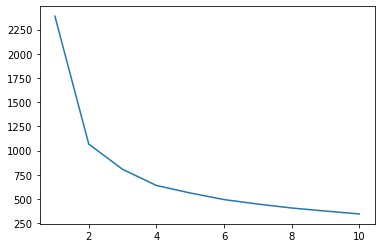

In [37]:
plt.plot(range(1,11), wss)

KMeans with K=3

In [38]:
k_means = KMeans(n_clusters = 3)
k_means.fit(XScaled)
labels = k_means.labels_

In [39]:
#Cluster evaluation for 2 clusters: the silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score

In [40]:
# Calculating silhouette_score
silhouette_score(XScaled,labels)

0.3573212386095808

In [41]:
#KMeans with K=4

In [42]:
k_means = KMeans(n_clusters = 4,random_state=0)
k_means.fit(XScaled)
labels = k_means.labels_

In [43]:
silhouette_score(XScaled,labels)

0.3501501556223769

In [44]:
#KMeans with K=2

In [45]:
k_means = KMeans(n_clusters = 2,random_state=0)
k_means.fit(XScaled)
labels = k_means.labels_

In [46]:
silhouette_score(XScaled,labels)

0.5052652095351478

# silhouette score is better for 2 clusters than for 3 &4 clusters. So, final clusters will be 2

In [47]:
df["Clus_kmeans4"] = labels
df.head()

mpg  cyl   disp     hp    wt   acc  yr  Clus_kmeans4
0  18.0    8  307.0  130.0  3504  12.0  70             1
1  15.0    8  350.0  165.0  3693  11.5  70             1
2  18.0    8  318.0  150.0  3436  11.0  70             1
3  16.0    8  304.0  150.0  3433  12.0  70             1
4  17.0    8  302.0  140.0  3449  10.5  70             1

In [48]:
df.Clus_kmeans4.value_counts().sort_index()

0    294
1    104
Name: Clus_kmeans4, dtype: int64

In [49]:
clust_profile=df.drop(['mpg'],axis=1)

clust_profile=clust_profile.groupby('Clus_kmeans4').mean()

clust_profile['freq']=df.Clus_kmeans4.value_counts().sort_index()

clust_profile

cyl        disp          hp          wt        acc  \
Clus_kmeans4                                                            
0             4.568027  140.198980   85.112245  2569.47619  16.520408   
1             7.961538  343.894231  158.557692  4103.87500  12.875962   

                     yr  freq  
Clus_kmeans4                   
0             76.768707   294  
1             73.865385   104

In [50]:
from sklearn.cluster import AgglomerativeClustering 

In [51]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')

In [52]:
model.fit(XScaled)

AgglomerativeClustering(linkage='average')

In [53]:
df['labels'] = model.labels_
df.head(10)

#custDataAttr.groupby(["labels"]).count()

mpg  cyl   disp     hp    wt   acc  yr  Clus_kmeans4  labels
0  18.0    8  307.0  130.0  3504  12.0  70             1       1
1  15.0    8  350.0  165.0  3693  11.5  70             1       1
2  18.0    8  318.0  150.0  3436  11.0  70             1       1
3  16.0    8  304.0  150.0  3433  12.0  70             1       1
4  17.0    8  302.0  140.0  3449  10.5  70             1       1
5  15.0    8  429.0  198.0  4341  10.0  70             1       1
6  14.0    8  454.0  220.0  4354   9.0  70             1       1
7  14.0    8  440.0  215.0  4312   8.5  70             1       1
8  14.0    8  455.0  225.0  4425  10.0  70             1       1
9  15.0    8  390.0  190.0  3850   8.5  70             1       1

In [54]:
custDataClust = df.groupby(['labels'])

In [55]:
custDataClust.mean()

mpg      cyl        disp          hp           wt        acc  \
labels                                                                       
0       26.448495  4.61204  142.700669   85.745819  2587.016722  16.519398   
1       14.653535  8.00000  346.626263  160.353535  4128.393939  12.694949   

              yr  Clus_kmeans4  
labels                          
0       76.77592      0.016722  
1       73.69697      1.000000

In [56]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [57]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(XScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(XScaled))

c

0.806660088032498

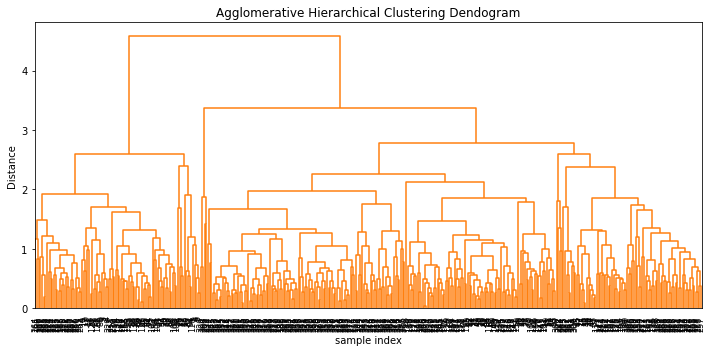

In [58]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [59]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(XScaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(XScaled))

c

0.693822632772564

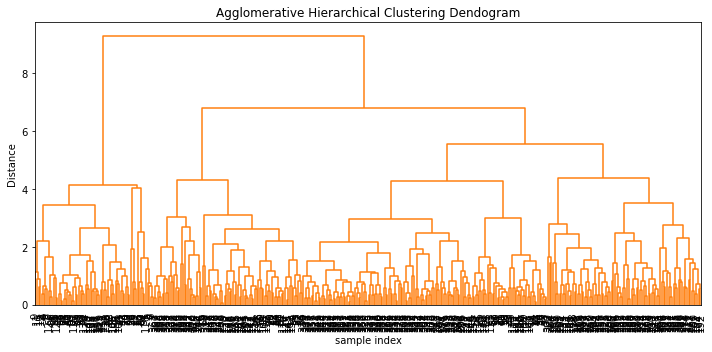

In [60]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [61]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(XScaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(XScaled))


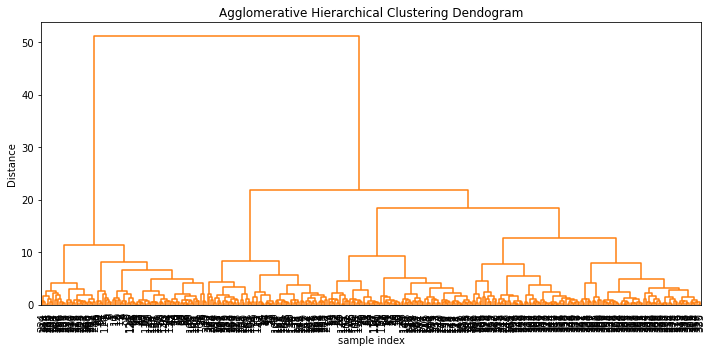

In [62]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

# Applying PCA

In [63]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00251889  0.95311615  0.84340357  0.89827376 -0.50669259 -0.34962425]
 [ 0.95311615  1.00251889  0.89803457  0.93517383 -0.54505356 -0.37109656]
 [ 0.84340357  0.89803457  1.00251889  0.86461476 -0.68831918 -0.41477495]
 [ 0.89827376  0.93517383  0.86461476  1.00251889 -0.41850885 -0.30733654]
 [-0.50669259 -0.54505356 -0.68831918 -0.41850885  1.00251889  0.28886274]
 [-0.34962425 -0.37109656 -0.41477495 -0.30733654  0.28886274  1.00251889]]


In [64]:
#Applying PCA
pca = PCA(n_components=6)
pca.fit(XScaled)

PCA(n_components=6)

In [65]:
#The eigen Values
print(pca.explained_variance_)

[4.26378678 0.84068225 0.67499578 0.13552589 0.06386533 0.03625731]


In [66]:
#The eigen Vectors
print(pca.explained_variance_)

[4.26378678 0.84068225 0.67499578 0.13552589 0.06386533 0.03625731]


In [67]:
#the percentage of variation explained by each eigen Vector

print(pca.explained_variance_ratio_)

[0.70884563 0.13976166 0.11221664 0.0225309  0.01061748 0.0060277 ]


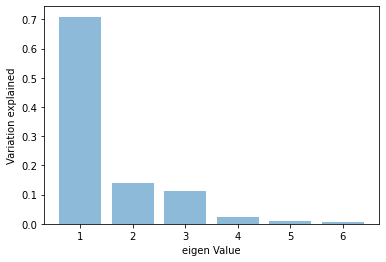

In [68]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

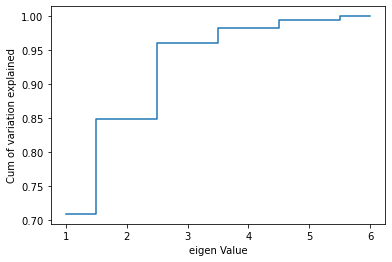

In [69]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [70]:
#Dimensionality Reduction
#Now 3 dimensions seems very reasonable. With 3 variables we can explain over 95% of the variation in the original data!

In [71]:
pca3 = PCA(n_components=3)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[ 0.45509041  0.46913807  0.46318283  0.44618821 -0.32466834 -0.23188446]
 [ 0.18276349  0.16077095  0.0139189   0.25676595  0.21039209  0.9112425 ]
 [ 0.17104591  0.13443134 -0.12440857  0.27156481  0.86752316 -0.33294164]]
[0.70884563 0.13976166 0.11221664]


In [72]:
Xpca3

array([[ 2.58470158, -1.13503558, -0.09158558],
       [ 3.36172518, -1.03670689, -0.24694524],
       [ 2.95892839, -1.20779415, -0.47937758],
       ...,
       [-1.16393463,  0.71574676, -2.16248162],
       [-1.94324569,  1.32567228,  0.14526268],
       [-1.95553788,  1.41517409,  0.41668135]])

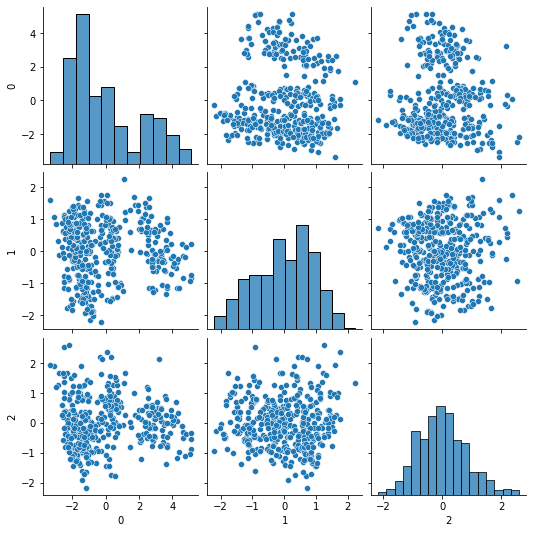

In [73]:
sns.pairplot(pd.DataFrame(Xpca3))

In [74]:
#Fit Linear model
#Lets construct two linear models. The first with all the 6 independent variables and 
#the second with only the 3 new variables constructed using PCA.

In [75]:
regression_model = LinearRegression()
regression_model.fit(XScaled, y)
regression_model.score(XScaled, y)

0.8087079552406331

In [76]:
regression_model_pca = LinearRegression()
regression_model_pca.fit(Xpca3, y)
regression_model_pca.score(Xpca3, y)

0.7799909620572006

# PART = 2

In [77]:
cdata= pd.read_excel("Part2 - Company.xlsx")
cdata

A    B    C    D    Quality
0    47   27   45  108  Quality A
1   174  133  134  166  Quality B
2   159  163  135  131        NaN
3    61   23    3   44  Quality A
4    59   60    9   68  Quality A
..  ...  ...  ...  ...        ...
56  200  186  185  179  Quality B
57  137  182  165  199        NaN
58   88   39    9  102        NaN
59  180  157  192  198        NaN
60  157  135  135  156        NaN

[61 rows x 5 columns]

In [78]:
cdata.shape

(61, 5)

In [79]:
cdata.duplicated().sum()

0

In [80]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


In [81]:
cdata.describe()

A           B           C           D
count   61.000000   61.000000   61.000000   61.000000
mean   118.557377  116.639344  114.081967  114.459016
std     61.771494   57.897908   65.615368   63.144431
min      3.000000    5.000000    3.000000    3.000000
25%     61.000000   63.000000   59.000000   51.000000
50%    136.000000  138.000000  135.000000  132.000000
75%    171.000000  168.000000  174.000000  174.000000
max    200.000000  200.000000  200.000000  199.000000

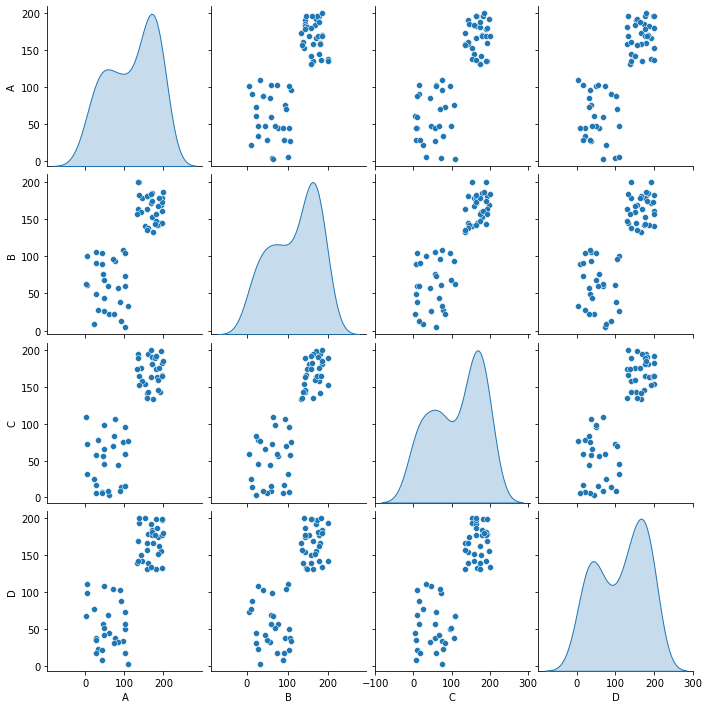

In [82]:
sns.pairplot(cdata, diag_kind='kde')

# Scaling the data

In [83]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [84]:
# Creating an object for the StandardScaler function
X = StandardScaler()

In [85]:
scaled_df = X.fit_transform(cdata.iloc[:,:-1])

In [86]:
scaled_df

array([[-1.16803431, -1.56107975, -1.06156947, -0.10313846],
       [ 0.90499245,  0.28492275,  0.30607663,  0.82301347],
       [ 0.66014677,  0.80737629,  0.32144344,  0.26412869],
       [-0.93951167, -1.63074022, -1.70697549, -1.1250992 ],
       [-0.97215776, -0.98638086, -1.61477463, -0.74186392],
       [ 0.5622085 ,  0.40682857,  0.61341283,  1.34996198],
       [-1.3802339 , -1.54366463, -0.55446474, -1.47639821],
       [ 1.18248422,  0.47648905,  0.44437792,  0.63139583],
       [ 0.67646981,  1.12084841,  1.22808523,  1.01463111],
       [ 0.43162413,  1.06860306,  0.67488007,  0.42381005],
       [-0.69466599, -0.39426685, -0.10882725, -1.23687616],
       [ 0.31736282,  1.45173565,  0.59804602,  1.23818502],
       [-1.49449521, -0.18528544, -0.87716775, -1.23687616],
       [-1.2006804 , -0.70773897, -0.89253456, -0.91751343],
       [ 1.10086899,  0.44165881,  0.49047835,  0.95075856],
       [ 1.26409944,  0.49390416,  0.79781455,  0.28009682],
       [-1.86992526, -0.

In [87]:
#Calculating WSS for other values of K - Elbow Method

In [88]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [89]:
wss

[244.00000000000003,
 45.52255176619499,
 37.57844392656556,
 32.57789588188791,
 28.364878998120926,
 24.66079674401436,
 22.15990515540862,
 19.187673133330165,
 17.35737466477113,
 16.357340659056437]

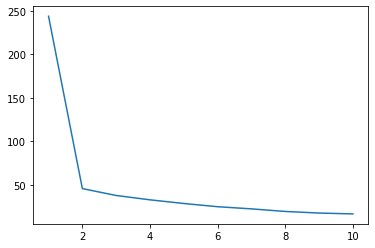

In [90]:
plt.plot(range(1,11), wss)

In [91]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [92]:
# Calculating silhouette_score
silhouette_score(scaled_df,labels)

0.49401175925440843

In [93]:
## Calculating silhouette_score
silhouette_score(scaled_df,labels)

0.49401175925440843

In [94]:
k_means = KMeans(n_clusters = 2,random_state=0)
k_means.fit(scaled_df)
labels = k_means.labels_

In [95]:
silhouette_score(scaled_df,labels)

0.6891674125195145

In [96]:
cdata["Clus_kmeans2"] = labels
cdata

A    B    C    D    Quality  Clus_kmeans2
0    47   27   45  108  Quality A             0
1   174  133  134  166  Quality B             1
2   159  163  135  131        NaN             1
3    61   23    3   44  Quality A             0
4    59   60    9   68  Quality A             0
..  ...  ...  ...  ...        ...           ...
56  200  186  185  179  Quality B             1
57  137  182  165  199        NaN             1
58   88   39    9  102        NaN             0
59  180  157  192  198        NaN             1
60  157  135  135  156        NaN             1

[61 rows x 6 columns]

In [97]:
pd.crosstab(cdata['Quality'],cdata['Clus_kmeans2'])

Clus_kmeans2   0   1
Quality             
Quality A     26   0
Quality B      0  17

In [98]:
cdata[['Quality','Clus_kmeans2']]

Quality  Clus_kmeans2
0   Quality A             0
1   Quality B             1
2         NaN             1
3   Quality A             0
4   Quality A             0
..        ...           ...
56  Quality B             1
57        NaN             1
58        NaN             0
59        NaN             1
60        NaN             1

[61 rows x 2 columns]

In [99]:
cdata.Clus_kmeans2.value_counts().sort_index()

0    28
1    33
Name: Clus_kmeans2, dtype: int64

In [100]:
clust_profile=cdata.drop(['Quality'],axis=1)

clust_profile=clust_profile.groupby('Clus_kmeans2').mean()

clust_profile['freq']=cdata.Clus_kmeans2.value_counts().sort_index()

clust_profile

A           B           C           D  freq
Clus_kmeans2                                                     
0              58.75000   60.928571   49.750000   53.000000    28
1             169.30303  163.909091  168.666667  166.606061    33

# Part = 3

In [101]:
vdata=pd.read_csv('Part3 - vehicle.csv')
vdata

compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0                        9          149.0   
2                    66.0                       10          207.0   
3                    63.0                        9          144.0   
4                   103.0                       52          149.0   
..                    ...                      ...            ...   
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                        159   
1             45.0                    19.0                        143   
2             32.0                    23.0                        158   
3             46.0                    19.0                        143   
4             45.0                    19.0                        144   
..             ...                     ...                        ...   
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              223.0              635.0                      220.0   
3              160.0              309.0                      127.0   
4              241.0              325.0                      188.0   
..               ...                ...                        ...   
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           73.0            14.0               9.0   
3                           63.0             6.0              10.0   
4                          127.0             9.0              11.0   
..                           ...             ...               ...   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   

In [102]:
vdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [103]:
vdata.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [104]:
df=vdata.dropna()

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  813 non-null    int64  
 1   circularity                  813 non-null    float64
 2   distance_circularity         813 non-null    float64
 3   radius_ratio                 813 non-null    float64
 4   pr.axis_aspect_ratio         813 non-null    float64
 5   max.length_aspect_ratio      813 non-null    int64  
 6   scatter_ratio                813 non-null    float64
 7   elongatedness                813 non-null    float64
 8   pr.axis_rectangularity       813 non-null    float64
 9   max.length_rectangularity    813 non-null    int64  
 10  scaled_variance              813 non-null    float64
 11  scaled_variance.1            813 non-null    float64
 12  scaled_radius_of_gyration    813 non-null    float64
 13  scaled_radius_of_gyr

In [106]:
df.duplicated().sum()

0

In [107]:
df.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   813.000000   813.000000             813.00000    813.000000   
mean     93.656827    44.803198              82.04305    169.098401   
std       8.233751     6.146659              15.78307     33.615402   
min      73.000000    33.000000              40.00000    104.000000   
25%      87.000000    40.000000              70.00000    141.000000   
50%      93.000000    44.000000              79.00000    167.000000   
75%     100.000000    49.000000              98.00000    195.000000   
max     119.000000    59.000000             112.00000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            813.000000               813.000000     813.000000   
mean              61.774908                 8.599016     168.563346   
std                7.973000                 4.677174      33.082186   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     146.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count      813.00000              813.000000                 813.000000   
mean        40.98893               20.558426                 147.891759   
std          7.80338                2.573184                  14.504648   
min         26.00000               17.000000                 118.000000   
25%         33.00000               19.000000                 137.000000   
50%         43.00000               20.000000                 146.000000   
75%         46.00000               23.000000                 159.000000   
max         61.00000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       813.000000         813.000000                 813.000000   
mean        188.377614         438.382534                 174.252153   
std          31.165873         175.270368                  32.332161   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         364.000000                 173.000000   
75%         217.000000         586.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   813.000000      813.000000        813.000000   
mean                     72.399754        6.351784         12.687577   
std                       7.475994        4.921476          8.926951   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          6.000000   
50%                      71.000000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        813.000000     813.000000  
mean         188.979090     195.729397  
std            6.153681       7.398781  
min          176.000000     181.000000  
25%          184.000000     191.000000  
50%          189.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

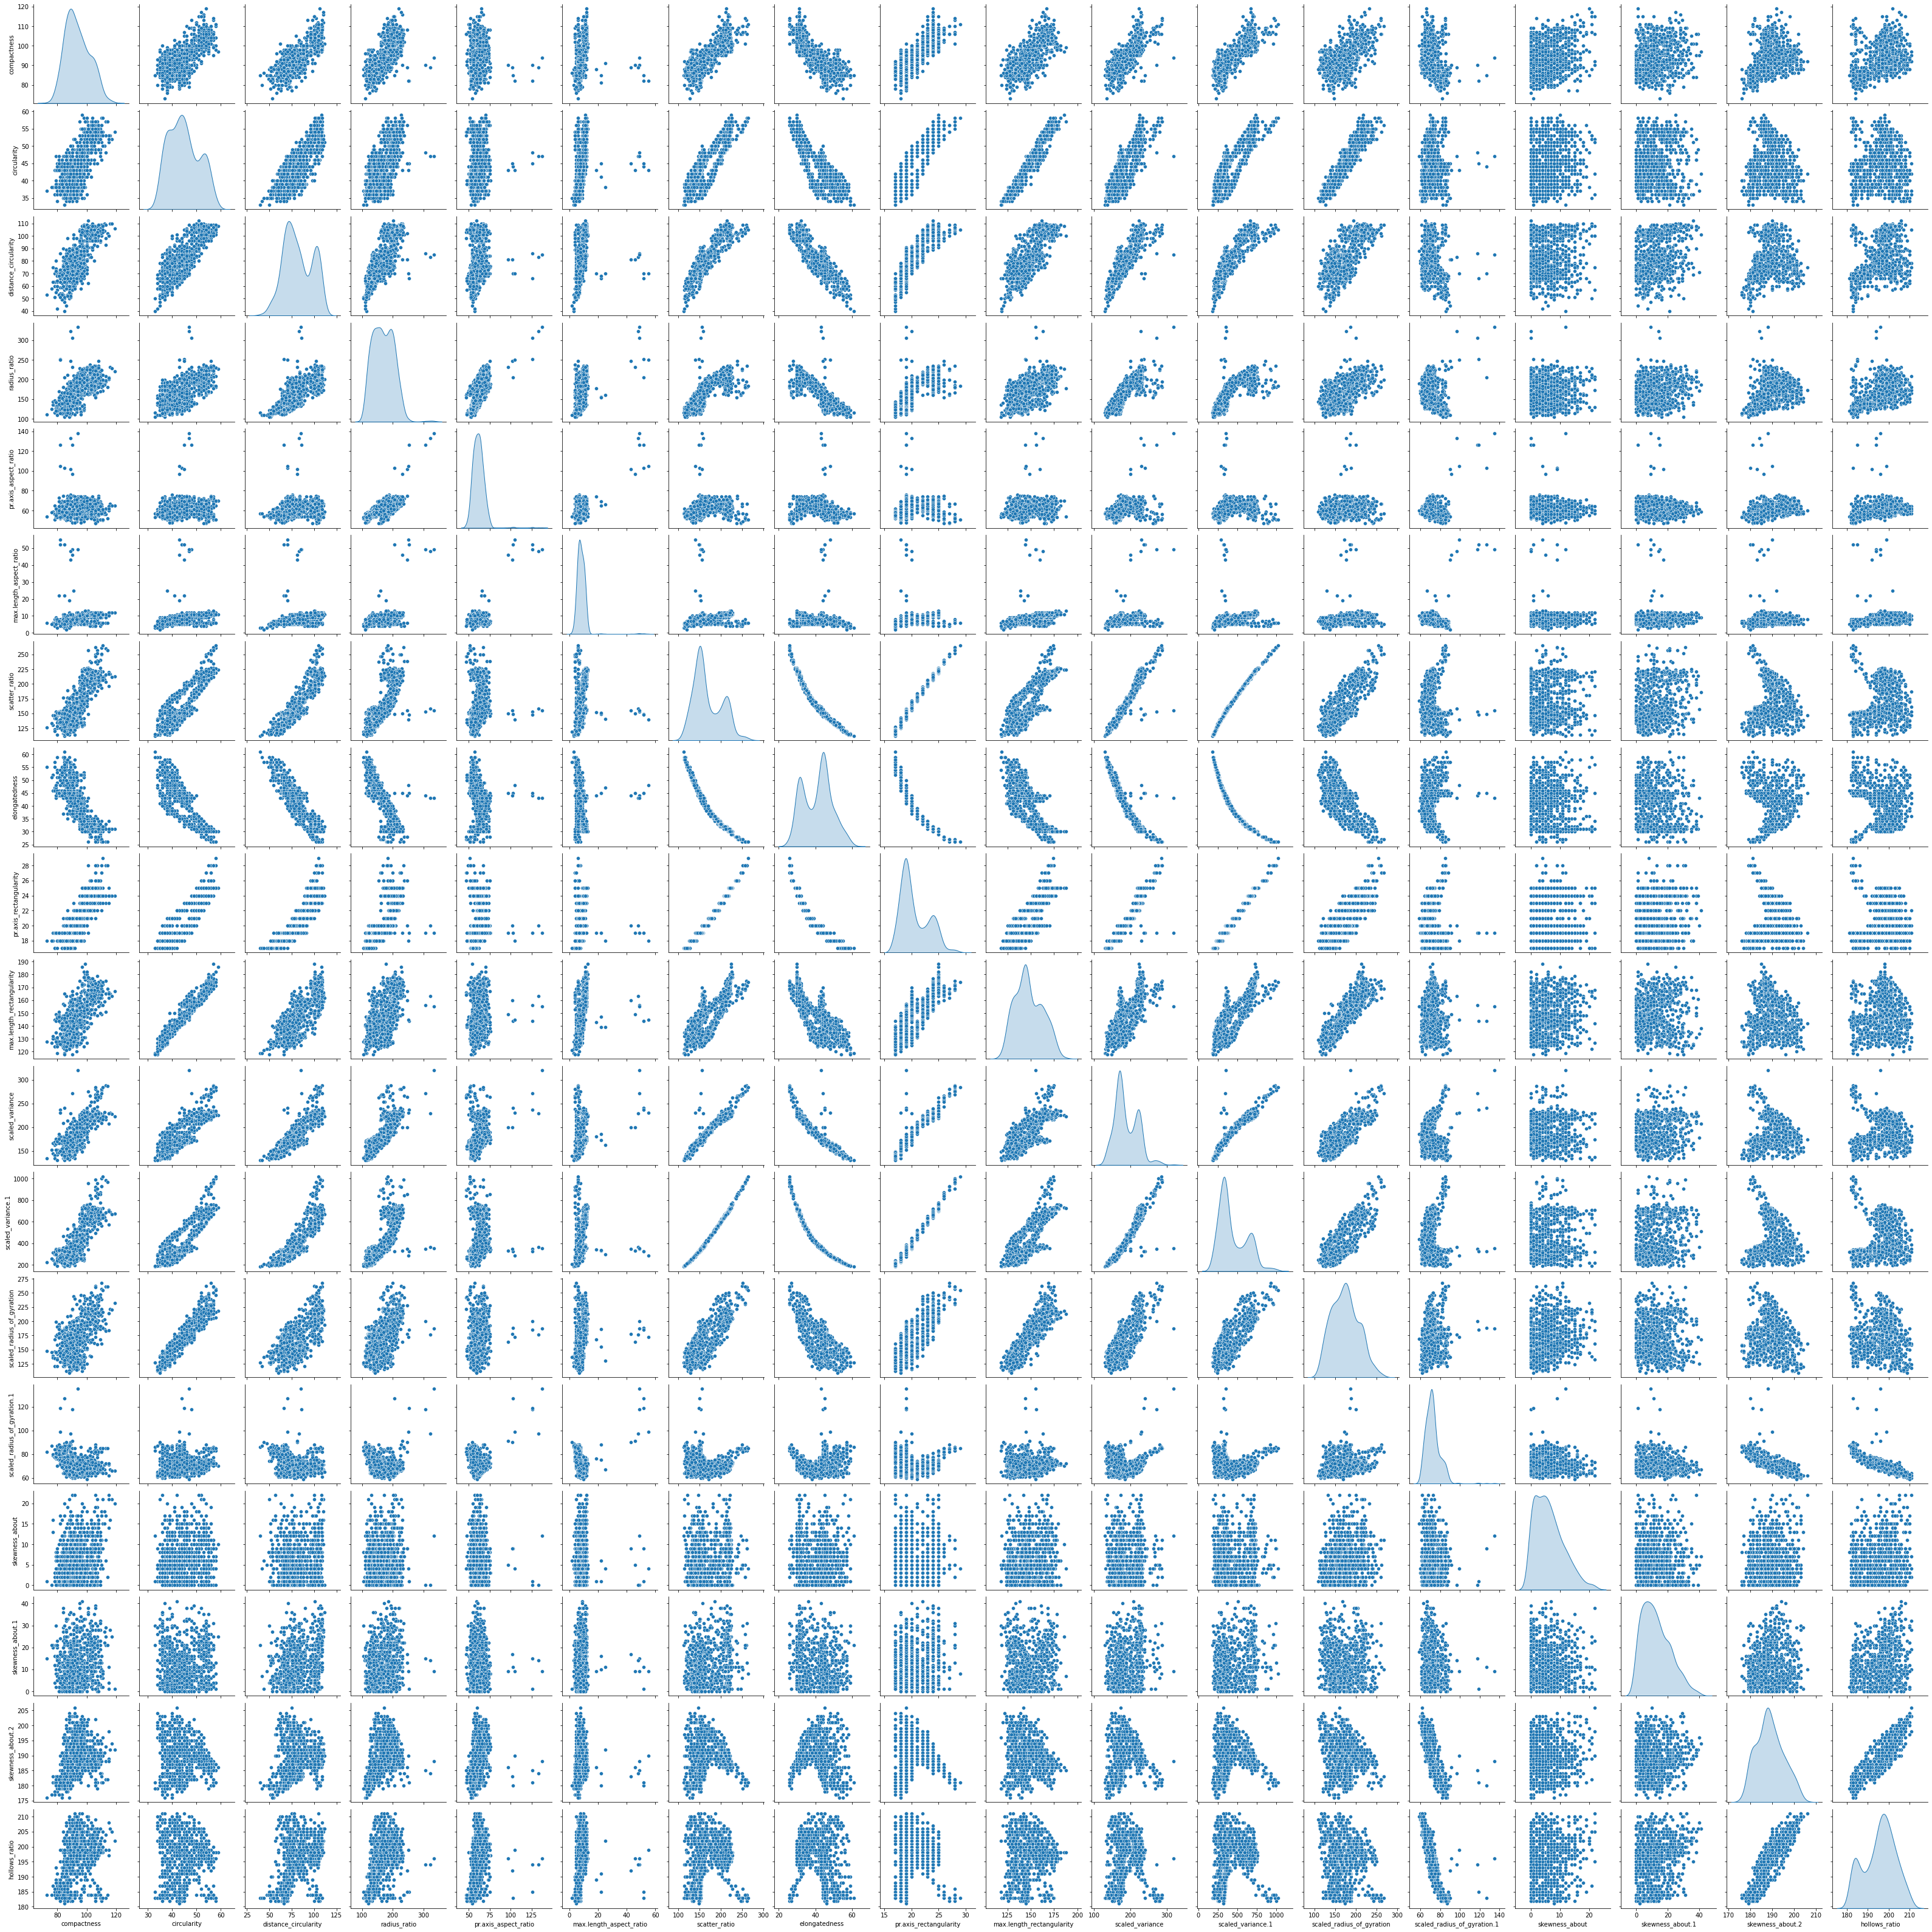

In [108]:
sns.pairplot(df, diag_kind='kde')

In [109]:
#Since the variable is categorical, you can use value_counts function
pd.value_counts(df['class'])

car    413
bus    205
van    195
Name: class, dtype: int64

<AxesSubplot:>

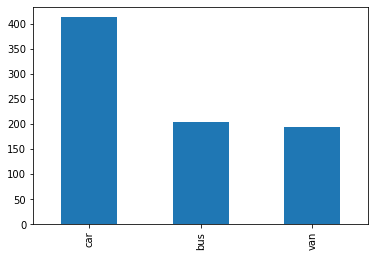

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.value_counts(df["class"]).plot(kind="bar")

<AxesSubplot:>

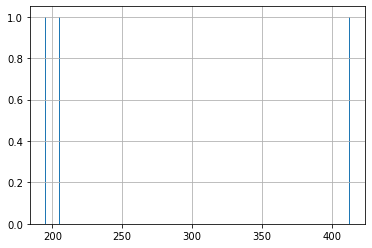

In [111]:
pd.value_counts(df['class']).hist(bins=300)

In [112]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [113]:
interest_df = df.drop('class', axis=1)
y=df['class']

In [114]:
from scipy.stats import zscore
interest_df_z = interest_df.apply(zscore)

In [115]:
interest_df_z.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.163231     0.520408              0.060669      0.264970   
1    -0.322874    -0.619123              0.124067     -0.836393   
2     1.256966     0.845988              1.518823      1.187734   
3    -0.079822    -0.619123             -0.002729     -0.300595   
4    -1.052030    -0.130753             -0.763506      1.068668   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.283254                 0.299721      -0.198517   
1             -0.599253                 0.085785      -0.591720   
2              0.530251                 0.299721       1.162569   
3              0.153750                 0.085785      -0.742952   
4              5.173770                 9.285029      -0.591720   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.129648               -0.217151                   0.766312   
1       0.514333               -0.606014                  -0.337462   
2      -1.152637                0.949438                   0.697326   
3       0.642562               -0.606014                  -0.337462   
4       0.514333               -0.606014                  -0.268476   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.397397          -0.339014                   0.301676   
1        -0.590034          -0.618754                  -0.502972   
2         1.111591           1.122486                   1.415804   
3        -0.911095          -0.738643                  -1.462359   
4         1.689501          -0.647299                   0.425468   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.321192       -0.071523          0.371287   
1                    -0.053505        0.538425          0.147109   
2                     0.080339        1.555006         -0.413338   
3                    -1.258099       -0.071523         -0.301249   
4                     7.307905        0.538425         -0.189159   

   skewness_about.2  hollows_ratio  
0         -0.321809       0.171837  
1          0.003400       0.442318  
2         -0.159204       0.036596  
3          1.629444       1.524243  
4         -1.460039      -1.721531

In [116]:
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
X_std = sc.fit_transform(interest_df)

In [117]:
X_std[:2]

array([[ 0.16323063,  0.52040788,  0.06066872,  0.26497017,  1.2832543 ,
         0.2997208 , -0.19851729,  0.12964799, -0.21715097,  0.76631152,
        -0.39739727, -0.33901388,  0.30167634, -0.32119222, -0.07152328,
         0.37128716, -0.3218087 ,  0.17183708],
       [-0.32287376, -0.61912319,  0.12406675, -0.83639333, -0.59925336,
         0.08578488, -0.59171992,  0.51433345, -0.60601383, -0.33746218,
        -0.59003405, -0.61875406, -0.50297155, -0.0535046 ,  0.53842522,
         0.14710858,  0.00340009,  0.44231829]])

# Using hierarchial clustering

In [118]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [119]:
##Combine all three arrays a,b,c into a dataframe
X = np.concatenate((a, b, c), axis=0)
print(X.shape)  # 250 samples with 2 dimensions

(250, 2)


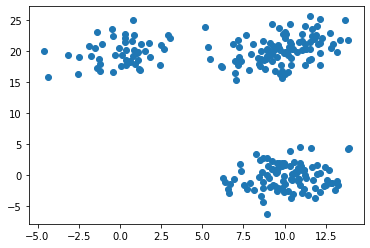

In [120]:
#Using scatter matrix to print all the 3 distributions
plt.scatter(X[:,0], X[:,1])
plt.show()

In [121]:
#Finding out the linkage matrix

In [122]:
#### generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'ward', metric='euclidean')
Z.shape

(249, 4)

In [123]:
Z[:]

array([[6.00000000e+00, 3.50000000e+01, 4.03105214e-02, 2.00000000e+00],
       [1.59000000e+02, 2.47000000e+02, 4.15336058e-02, 2.00000000e+00],
       [1.90000000e+02, 2.14000000e+02, 4.23431904e-02, 2.00000000e+00],
       [1.50000000e+01, 5.50000000e+01, 5.03965285e-02, 2.00000000e+00],
       [2.30000000e+01, 9.70000000e+01, 5.98615830e-02, 2.00000000e+00],
       [1.83000000e+02, 2.30000000e+02, 7.14307127e-02, 2.00000000e+00],
       [1.60000000e+02, 1.84000000e+02, 8.10640748e-02, 2.00000000e+00],
       [5.20000000e+01, 9.80000000e+01, 8.63310058e-02, 2.00000000e+00],
       [1.75000000e+02, 2.33000000e+02, 9.07935743e-02, 2.00000000e+00],
       [8.00000000e+00, 1.90000000e+01, 1.05398862e-01, 2.00000000e+00],
       [6.60000000e+01, 7.30000000e+01, 1.08977001e-01, 2.00000000e+00],
       [5.90000000e+01, 9.60000000e+01, 1.15828291e-01, 2.00000000e+00],
       [9.20000000e+01, 2.53000000e+02, 1.34937651e-01, 3.00000000e+00],
       [2.10000000e+02, 2.31000000e+02, 1.37055098e

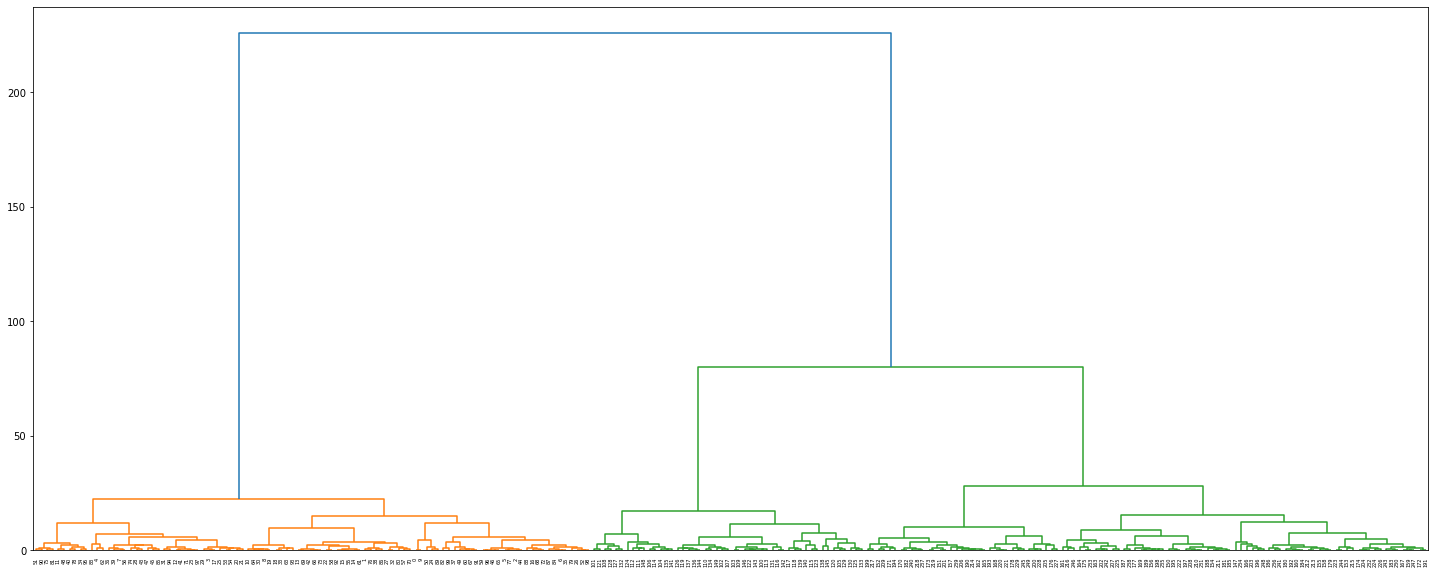

In [124]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

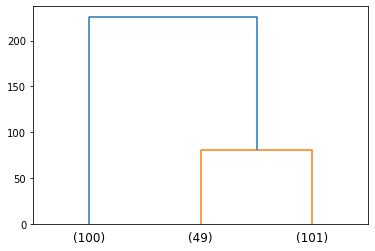

In [125]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [126]:
max_d = 50

In [127]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

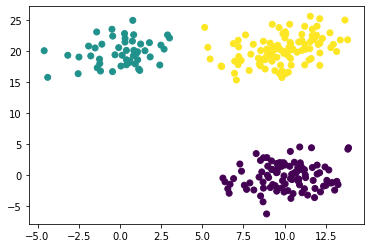

In [128]:
#### plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters)  # plot points with cluster dependent colors
plt.show()

# Applying PCA

In [129]:
interest_df = df.drop('class', axis=1)
y=df['class']

In [130]:
from scipy.stats import zscore
XScaled=interest_df.apply(zscore)
XScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.163231     0.520408              0.060669      0.264970   
1    -0.322874    -0.619123              0.124067     -0.836393   
2     1.256966     0.845988              1.518823      1.187734   
3    -0.079822    -0.619123             -0.002729     -0.300595   
4    -1.052030    -0.130753             -0.763506      1.068668   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.283254                 0.299721      -0.198517   
1             -0.599253                 0.085785      -0.591720   
2              0.530251                 0.299721       1.162569   
3              0.153750                 0.085785      -0.742952   
4              5.173770                 9.285029      -0.591720   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.129648               -0.217151                   0.766312   
1       0.514333               -0.606014                  -0.337462   
2      -1.152637                0.949438                   0.697326   
3       0.642562               -0.606014                  -0.337462   
4       0.514333               -0.606014                  -0.268476   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.397397          -0.339014                   0.301676   
1        -0.590034          -0.618754                  -0.502972   
2         1.111591           1.122486                   1.415804   
3        -0.911095          -0.738643                  -1.462359   
4         1.689501          -0.647299                   0.425468   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.321192       -0.071523          0.371287   
1                    -0.053505        0.538425          0.147109   
2                     0.080339        1.555006         -0.413338   
3                    -1.258099       -0.071523         -0.301249   
4                     7.307905        0.538425         -0.189159   

   skewness_about.2  hollows_ratio  
0         -0.321809       0.171837  
1          0.003400       0.442318  
2         -0.159204       0.036596  
3          1.629444       1.524243  
4         -1.460039      -1.721531

In [131]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00123153  0.69073497  0.79092746  0.68897729  0.09066804  0.1505537
   0.81502868 -0.78902127  0.81522961  0.67573322  0.76532752  0.82125027
   0.58212123 -0.25875528  0.23193313  0.16859183  0.29656022  0.3732647 ]
 [ 0.69073497  1.00123153  0.79868656  0.62471862  0.15521415  0.25192897
   0.85920548 -0.8261242   0.85719089  0.96655501  0.80710097  0.85197956
   0.93674669  0.0491303   0.1419004  -0.00197723 -0.1140426   0.04939203]
 [ 0.79092746  0.79868656  1.00123153  0.77235395  0.16358689  0.26591783
   0.91014241 -0.9138366   0.89836576  0.77441118  0.86674929  0.89288735
   0.70655787 -0.23843852  0.11041593  0.278193    0.14543699  0.34365085]
 [ 0.68897729  0.62471862  0.77235395  1.00123153  0.66819724  0.45301698
   0.74438595 -0.79674104  0.71709175  0.57118076  0.80778118  0.73267385
   0.54530637 -0.17556405  0.04474816  0.17829807  0.37605357  0.47147529]
 [ 0.09066804  0.15521415  0.16358689  0.66819724  1.00123153  0.6528959
   0.11383635 -0.19142882  0.0870987

In [132]:
pca = PCA(n_components=18)
pca.fit(XScaled)

PCA(n_components=18)

In [133]:
#eigenvalues
print(pca.explained_variance_)

[9.45338700e+00 2.98961888e+00 1.91768721e+00 1.17011696e+00
 9.29094522e-01 5.32171101e-01 3.59073770e-01 2.22360825e-01
 1.56093142e-01 9.28191209e-02 6.35293025e-02 4.43920604e-02
 3.47623783e-02 2.12103219e-02 1.61152840e-02 1.31079986e-02
 6.26175180e-03 3.65863172e-04]


In [134]:
#eigenvector
print(pca.components_)

[[ 2.74447428e-01  2.94003600e-01  3.04380218e-01  2.68888600e-01
   8.30199914e-02  9.84825471e-02  3.16688948e-01 -3.13205048e-01
   3.13612229e-01  2.81285672e-01  3.09161565e-01  3.14163506e-01
   2.70337322e-01 -2.56036923e-02  3.96799548e-02  6.31600075e-02
   3.09410342e-02  7.93661290e-02]
 [-1.27105989e-01  1.34430321e-01 -7.21448351e-02 -1.76416250e-01
  -9.87633531e-02  3.02068515e-02  4.43899402e-02  1.52539710e-02
   5.72306050e-02  1.20324381e-01  6.19096771e-02  4.80210991e-02
   2.10169704e-01  4.93793797e-01 -5.62601909e-02 -1.21035426e-01
  -5.44491703e-01 -5.38881650e-01]
 [-1.15778231e-01 -3.64513515e-02 -5.51881577e-02  2.81804540e-01
   6.45768877e-01  5.86412351e-01 -9.85848213e-02  5.66515157e-02
  -1.12039253e-01 -2.41324720e-02  5.97234736e-02 -1.09452782e-01
  -3.70630986e-02  2.75779539e-01 -1.10191782e-01 -8.04993535e-02
   3.17280047e-02  5.69462532e-02]
 [ 8.00766389e-02  1.90342131e-01 -6.93709791e-02 -4.46505645e-02
   3.00532206e-02  2.97502955e-02 -9.

In [135]:
#And the percentage of variation explained by each eigen Vector

print(pca.explained_variance_ratio_)

[5.24542179e-01 1.65885645e-01 1.06407135e-01 6.49265390e-02
 5.15528736e-02 2.95286958e-02 1.99240058e-02 1.23381844e-02
 8.66117477e-03 5.15027513e-03 3.52506448e-03 2.46319209e-03
 1.92886778e-03 1.17690183e-03 8.94192335e-04 7.27326420e-04
 3.47447209e-04 2.03007309e-05]


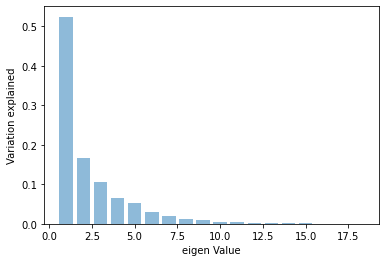

In [136]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

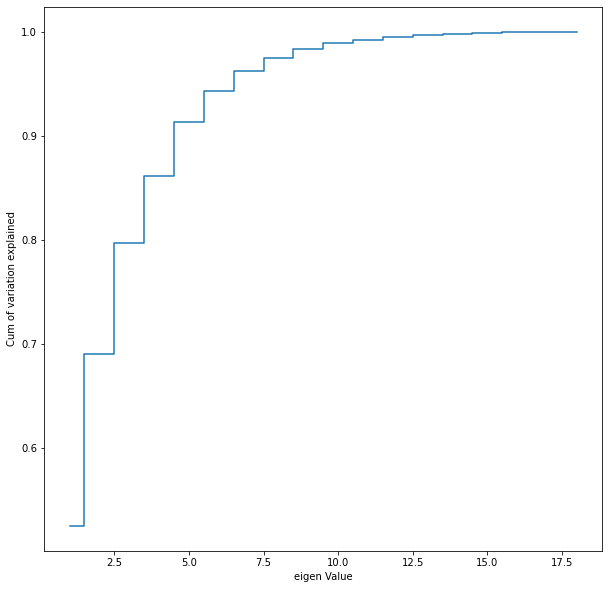

In [137]:
plt.figure(figsize=(10 , 10))
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [138]:
pca3 = PCA(n_components=10)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[ 2.74447428e-01  2.94003600e-01  3.04380218e-01  2.68888600e-01
   8.30199914e-02  9.84825471e-02  3.16688948e-01 -3.13205048e-01
   3.13612229e-01  2.81285672e-01  3.09161565e-01  3.14163506e-01
   2.70337322e-01 -2.56036923e-02  3.96799548e-02  6.31600075e-02
   3.09410342e-02  7.93661290e-02]
 [-1.27105989e-01  1.34430321e-01 -7.21448351e-02 -1.76416250e-01
  -9.87633531e-02  3.02068515e-02  4.43899402e-02  1.52539710e-02
   5.72306050e-02  1.20324381e-01  6.19096771e-02  4.80210991e-02
   2.10169704e-01  4.93793797e-01 -5.62601909e-02 -1.21035426e-01
  -5.44491703e-01 -5.38881650e-01]
 [-1.15778231e-01 -3.64513515e-02 -5.51881577e-02  2.81804540e-01
   6.45768877e-01  5.86412351e-01 -9.85848213e-02  5.66515157e-02
  -1.12039253e-01 -2.41324720e-02  5.97234736e-02 -1.09452782e-01
  -3.70630986e-02  2.75779539e-01 -1.10191782e-01 -8.04993535e-02
   3.17280047e-02  5.69462532e-02]
 [ 8.00766389e-02  1.90342131e-01 -6.93709791e-02 -4.46505645e-02
   3.00532206e-02  2.97502955e-02 -9.

In [139]:
Xpca3

array([[ 0.35224921, -0.14102681,  0.96183193, ..., -0.38832347,
        -0.9081888 ,  0.08723554],
       [-1.5780723 , -0.4221973 , -0.36526142, ...,  0.25832407,
         0.13788287, -0.09329092],
       [ 3.78255625,  0.25325744,  0.06175618, ...,  0.4788957 ,
        -0.27596753, -0.47740075],
       ...,
       [ 4.83112974,  0.07323619,  0.48997353, ...,  0.12766991,
        -0.61546869,  0.54772524],
       [-3.26941568, -1.01866536, -0.34344083, ...,  0.31487696,
        -0.22022929, -0.88751729],
       [-4.75521696,  0.30767001, -0.58216391, ..., -0.23686544,
        -0.45108813, -0.31389843]])

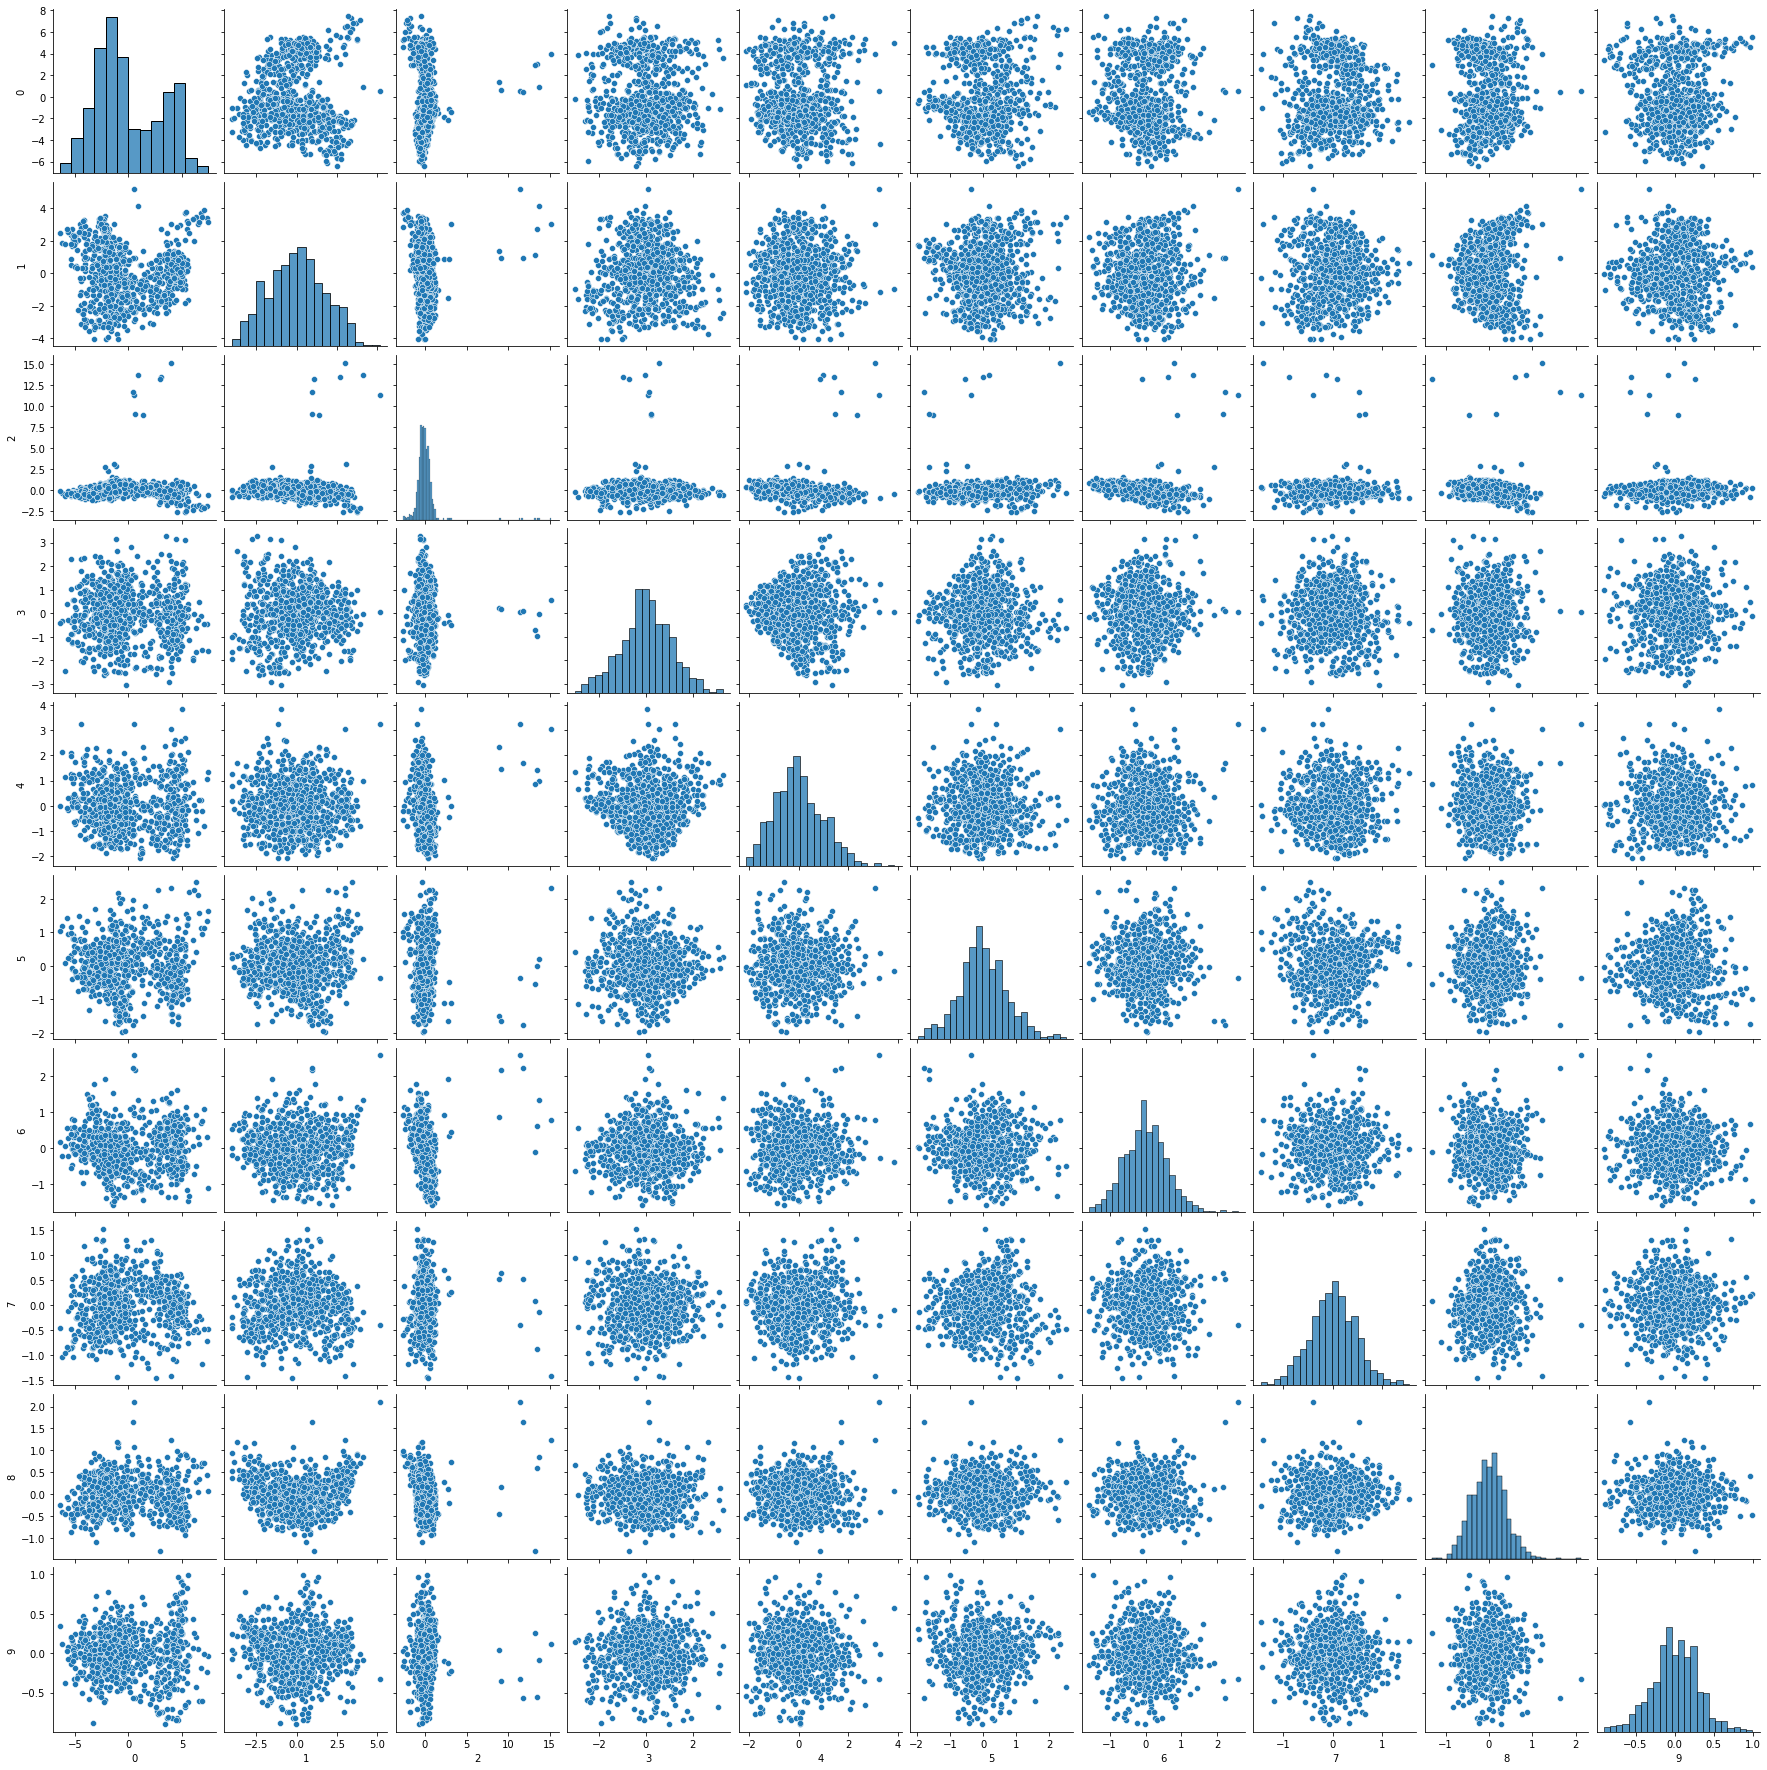

In [140]:
sns.pairplot(pd.DataFrame(Xpca3))

# Fit SVM Classier

In [141]:
from sklearn.svm import SVC

svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(XScaled, y)
svc_model.score(XScaled, y)

0.9434194341943419

In [142]:
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(Xpca3, y)
svc_model.score(Xpca3, y)

0.9015990159901599

# Part = 4

In [143]:
bdata=pd.read_csv('Part4 - batting_bowling_ipl_bat.csv')
bdata

Name   Runs    Ave      SR  Fours  Sixes   HF
0            NaN    NaN    NaN     NaN    NaN    NaN  NaN
1       CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
2            NaN    NaN    NaN     NaN    NaN    NaN  NaN
3      G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
4            NaN    NaN    NaN     NaN    NaN    NaN  NaN
..           ...    ...    ...     ...    ...    ...  ...
175  PC Valthaty   30.0   5.00   58.82    4.0    0.0  0.0
176          NaN    NaN    NaN     NaN    NaN    NaN  NaN
177     RP Singh    6.0   3.00   50.00    0.0    0.0  0.0
178          NaN    NaN    NaN     NaN    NaN    NaN  NaN
179     R Sharma    2.0   0.50   18.18    0.0    0.0  0.0

[180 rows x 7 columns]

In [144]:
bdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 10.0+ KB


In [145]:
bdata=bdata.dropna()

In [146]:
bdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [147]:
bdata.duplicated().sum()

0

In [148]:
bdata

Name   Runs    Ave      SR  Fours  Sixes   HF
1       CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
3      G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
5       V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0
7       CL White  479.0  43.54  149.68   41.0   20.0  5.0
9       S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0
..           ...    ...    ...     ...    ...    ...  ...
171       Z Khan   12.0   6.00   70.58    1.0    0.0  0.0
173   WD Parnell   19.0   4.75   70.37    2.0    0.0  0.0
175  PC Valthaty   30.0   5.00   58.82    4.0    0.0  0.0
177     RP Singh    6.0   3.00   50.00    0.0    0.0  0.0
179     R Sharma    2.0   0.50   18.18    0.0    0.0  0.0

[90 rows x 7 columns]

In [149]:
bdata.isna().sum()

Name     0
Runs     0
Ave      0
SR       0
Fours    0
Sixes    0
HF       0
dtype: int64

In [150]:
bdata.describe()

Runs        Ave          SR      Fours      Sixes         HF
count   90.000000  90.000000   90.000000  90.000000  90.000000  90.000000
mean   219.933333  24.729889  119.164111  19.788889   7.577778   1.188889
std    156.253669  13.619215   23.656547  16.399845   8.001373   1.688656
min      2.000000   0.500000   18.180000   0.000000   0.000000   0.000000
25%     98.000000  14.665000  108.745000   6.250000   3.000000   0.000000
50%    196.500000  24.440000  120.135000  16.000000   6.000000   0.500000
75%    330.750000  32.195000  131.997500  28.000000  10.000000   2.000000
max    733.000000  81.330000  164.100000  73.000000  59.000000   9.000000

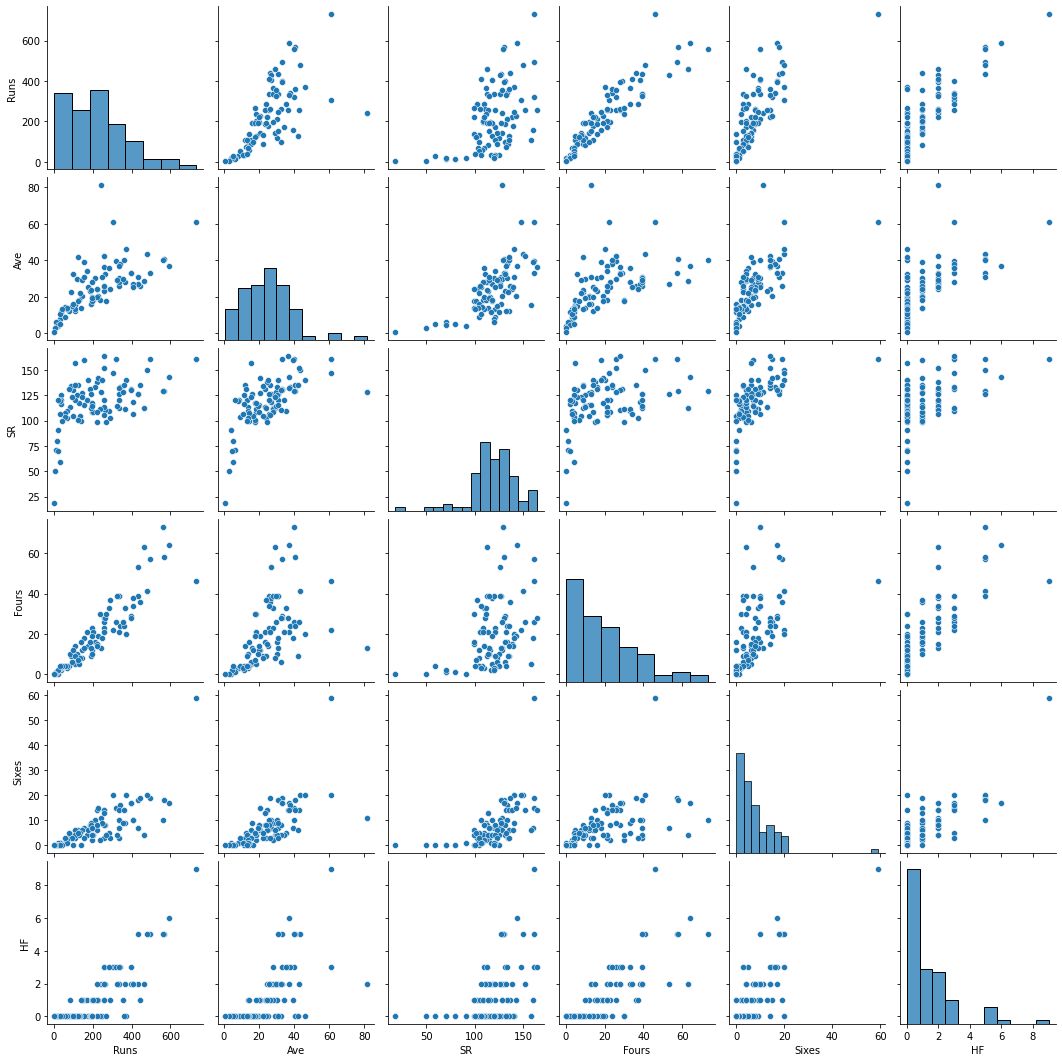

In [151]:
sns.pairplot(bdata)

In [152]:
# we separate the target variable (class) and save it in the y variable. Also the X contains the independant variables.
X = bdata.drop('Name',axis=1)
y = bdata['Name']

In [153]:
#splitting the data in test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [154]:
# scaling the data using the standard scaler
from sklearn.preprocessing import StandardScaler
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

In [155]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train_sd.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[1.01408451 0.71643805 0.52868489 0.93761431 0.7931402  0.87221168]
 [0.71643805 1.01408451 0.62859448 0.58759297 0.68873556 0.66570827]
 [0.52868489 0.62859448 1.01408451 0.44343025 0.58925599 0.451216  ]
 [0.93761431 0.58759297 0.44343025 1.01408451 0.56273746 0.82531194]
 [0.7931402  0.68873556 0.58925599 0.56273746 1.01408451 0.80524058]
 [0.87221168 0.66570827 0.451216   0.82531194 0.80524058 1.01408451]]
Eigenvectors 
[[-0.45532124 -0.25787474 -0.68126835 -0.49622036  0.12064832  0.03558028]
 [-0.39606052  0.31716349  0.0660585   0.02398999 -0.09334341 -0.85375122]
 [-0.3268058   0.73417733 -0.06816646  0.14415814  0.43306392  0.37577789]
 [-0.41047151 -0.43368327  0.59329277 -0.08178628  0.5334169   0.01459685]
 [-0.41380082  0.1395117   0.36544188 -0.33377088 -0.67183491  0.3361435 ]
 [-0.43508462 -0.29384842 -0.20327066  0.78378331 -0.23084821  0.1242109 ]]

Eigenvalues 
[4.41625834 0.76937994 0.01577066 0.13621758 0.41740081 0.32947971]


In [156]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 72.58202369  85.22692548  92.08698514  97.50204516  99.74080635
 100.        ]


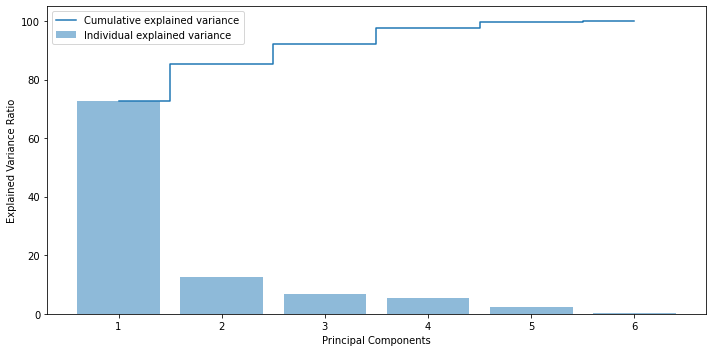

In [157]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [158]:
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:6]

[(4.416258343048437,
  array([-0.45532124, -0.39606052, -0.3268058 , -0.41047151, -0.41380082,
         -0.43508462])),
 (0.7693799394132355,
  array([-0.25787474,  0.31716349,  0.73417733, -0.43368327,  0.1395117 ,
         -0.29384842])),
 (0.41740081360288467,
  array([ 0.12064832, -0.09334341,  0.43306392,  0.5334169 , -0.67183491,
         -0.23084821])),
 (0.3294797082117747,
  array([ 0.03558028, -0.85375122,  0.37577789,  0.01459685,  0.3361435 ,
          0.1242109 ])),
 (0.13621758195910927,
  array([-0.49622036,  0.02398999,  0.14415814, -0.08178628, -0.33377088,
          0.78378331])),
 (0.01577065601807561,
  array([-0.68126835,  0.0660585 , -0.06816646,  0.59329277,  0.36544188,
         -0.20327066]))]

In [159]:
# generating dimensionally reduced datasets
w = np.hstack((eigen_pairs[0][1].reshape(6,1), 
                      eigen_pairs[1][1].reshape(6,1)))
print('Matrix W:\n', w)
X_sd_pca = X_train_sd.dot(w)
X_test_sd_pca = X_test_sd.dot(w)

Matrix W:
 [[-0.45532124 -0.25787474]
 [-0.39606052  0.31716349]
 [-0.3268058   0.73417733]
 [-0.41047151 -0.43368327]
 [-0.41380082  0.1395117 ]
 [-0.43508462 -0.29384842]]


In [160]:
X_train_sd.shape, w.shape, X_sd_pca.shape, X_test_sd_pca.shape

((72, 6), (6, 2), (72, 2), (18, 2))

# Part = 5

# Listing down all possible dimensionality reduction techniques that can be implemented using python

In [161]:
# 1. Missing Value Ratio
# 2. Low Variance Filter
# 3. High Correlation filter
# 4. Random Forest
# 5. Backward Feature Elimination
# 6. Forward Feature Selection
# 7. Factor Analysis
# 8. Principal Component Analysis (PCA)
# 9. Independent Component Analysis
# 10. Methods Based on Projections
# 11. t- Distributed Stochastic Neighbor Embedding (t-SNE)
# 12. Uniform Manifold Approximation and Projection (UMAP)

In [162]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

X = np.load('X.npy')
Y = np.load('Y.npy')

X.shape

(2062, 64, 64)

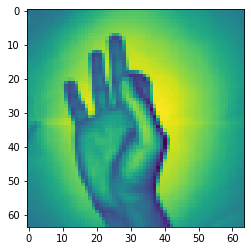

In [163]:
plt.imshow(X[0])

In [164]:
#the Y dataset here gives us the labels for these images, it's kind of weirdly ordered and this image represents the number
9 - np.argmax(Y[0])

9

In [165]:
#To start with let's flatten our data into 2062 4096 dim vectors and split the dataset into training and testing sets.

In [166]:
X_flat = np.array(X).reshape((2062, 64*64))

X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.3, random_state=42)

In [167]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), random_state=1)
clf.fit(X_train, y_train)

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 20, 20), random_state=1)

In [168]:
y_hat = clf.predict(X_test)

print("accuracy: " + str(accuracy_score(y_test, y_hat)))

accuracy: 0.3392568659127625


In [169]:
pca_dims = PCA()
pca_dims.fit(X_train)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [170]:
d

292

In [171]:
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [172]:
print("reduced shape: " + str(X_reduced.shape))
print("recovered shape: " + str(X_recovered.shape))

reduced shape: (1443, 292)
recovered shape: (1443, 4096)


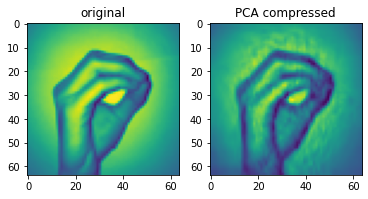

In [173]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.title("original")
plt.imshow(X_train[0].reshape((64,64)))
f.add_subplot(1,2, 2)

plt.title("PCA compressed")
plt.imshow(X_recovered[0].reshape((64,64)))
plt.show(block=True)

In [174]:
clf_reduced = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20))
clf_reduced.fit(X_reduced, y_train)

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 20, 20))

In [175]:
X_test_reduced = pca.transform(X_test)

y_hat_reduced = clf_reduced.predict(X_test_reduced)

print("accuracy: " + str(accuracy_score(y_test, y_hat_reduced)))

accuracy: 0.6526655896607432
